In [2]:
import step1,step2,step3
from constants import *
from prophet import Prophet

stock data are downloaded in data/<stock_name>/stock_data.csv

functions in the step1 script can fit a model on data. The user can choose the model, the data, and rerun on original:forecasted data with different timeframe

15:19:15 - cmdstanpy - INFO - Chain [1] start processing
15:19:17 - cmdstanpy - INFO - Chain [1] done processing


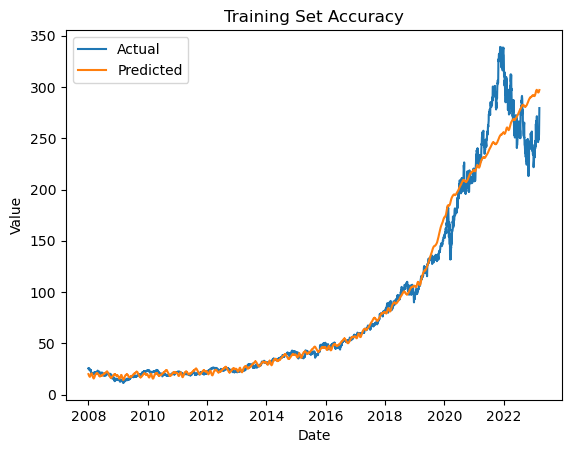

In [3]:
df=step1.load_csv('MSFT',forecaster=False)
model=step1.fit_model('MSFT',save=True)
step1.plot_training_accuracy('MSFT',save=True,show=True,forecaster=False)

In [4]:
df=step1.forecast('MSFT', horizon=30)

In [9]:
df.iloc[-1]['ds']

Timestamp('2023-04-16 00:00:00')

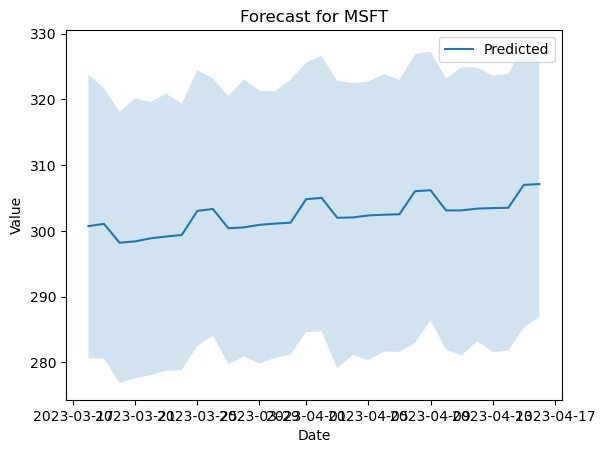

In [5]:
step1.plot_forecast('MSFT',df,save=True,show=True)

In [ ]:
step2.download_data(['MSFT'],df.iloc[0]['ds'],df.iloc[-1]['ds'])

In [8]:
for stock,company in company_dict.items():
    print(stock)

AAPL
MSFT
AMZN
GOOGL
TSLA
NVDA
JPM
JNJ
V
PG
MA
HD
UNH
PYPL
DIS
BAC
NFLX
VZ
CMCSA


In [ ]:
create forecasted data for every stock i 

In [ ]:
stock_symbols = get_n_largest_companies(N_LARGEST_COMPANIES)
download_stock_data(stock_symbols)


In [ ]:
stock_data = {}
for stock in stock_symbols:
    stock_data[stock] = pd.read_csv(os.path.join(STOCKS_DIR, stock, 'historical_data.csv'), index_col=0, parse_dates=True)['Adj Close']

stock_returns = pd.DataFrame(stock_data).pct_change().dropna()


In [ ]:
model = ProphetModel()
model.fit(stock_returns)


In [ ]:
portfolio_optimizer = PortfolioOptimizer(stock_returns)
portfolio_optimizer.calculate_metrics()
portfolio_optimizer.optimize()


In [ ]:
plot_efficient_frontier(portfolio_optimizer.portfolio)
plot_forecast(stock_returns, model, periods=365)
plot_monte_carlo_simulation(portfolio_optimizer.portfolio, periods=365, simulations=1000)
plot_donut_repartition(portfolio_optimizer.portfolio)
